## K-Nearest Neighbours from scratch

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


## Loading and preprocessing the data

In [2]:
data = pd.read_csv('iris.data.txt', header=None, names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])
y = data.Species
X = data.drop(['Species'], axis = 1)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Convert target to categorical and then numerical

In [3]:
y = y.astype('category')
species_mapping = {k:category for (k, category) in enumerate(list(y.cat.categories.values))}
y = y.cat.codes
                   
species_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

#### Split train-test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [5]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

#### Normalise the data

In [6]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

## KNN function

In [7]:
def knn(X_train, y_train, X_test, k, t):
    '''
    Computes target y for the test set.
    Inputs:
    X_train - Normalised train data
    y_train - Target of the training data
    k - No: of nearest neighbours
    X_test - Normalised test data
    t - Type of problem, either 'classification' or 'regression'
    
    Output:
    y_pred - Test predictions
    
    '''
    y_pred = [0]*len(X_test)
    cls = y_train.unique() 
    for row in range(len(X_test)):
        idx = np.argsort(np.linalg.norm(X_test[row] - X_train, axis=1))[0:k]
        class_count = {c:0 for c in cls}
        if t == 'classification':
            for c in cls:
                class_count[c] = np.sum(y_train.values[idx] == c)
                y_pred[row] = sorted(class_count, key = lambda x: class_count[x], reverse=True)[0]
        if t == 'regression':
            y_pred[row] = np.mean(y_train.values[idx])
    return(y_pred)

In [9]:
t = 'classification'
y_pred = knn(X_train, y_train, X_test, 10, t)

#### Compute prediction accuracy

In [10]:
accuracy_score(y_pred, y_test.values)

0.97777777777777775

### Choosing an optimal k

In [11]:
result = []
for i in range(100):
    result.append(accuracy_score(knn(X_train, y_train, X_test, i, t), y_test.values))

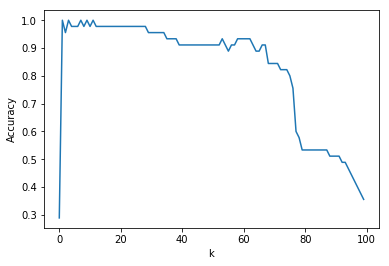

In [12]:
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('Accuracy')
ax.plot(result)

In [13]:
np.max(result), np.argmax(result)

(1.0, 1)

In [14]:
result[0:5]

[0.28888888888888886, 1.0, 0.9555555555555556, 1.0, 0.97777777777777775]